In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import matplotlib as mpl
import matplotlib.pylab as plt2

plt2.rcParams["font.family"] = "AppleSDGothicNeoM"
plt2.rcParams["font.size"] = 17
plt2.rcParams["figure.figsize"] = (10, 8)
mpl.rcParams['axes.unicode_minus'] = False 

In [3]:
from skinet.utils.athena_tools import *
conn = athena_connection()
df = load_from_athena(conn, '''
SELECT *
     , LAG(nth_contact_final_date) OVER (PARTITION BY custid ORDER BY custid, listid) AS prior_contact_final_date
  FROM (SELECT *
             , MAX(contactstartdate) OVER (PARTITION BY custid, listid ORDER BY custid, listid) AS nth_contact_final_date
	         , MIN(contactstartdate_new) OVER (PARTITION BY custid, listid ORDER BY custid, listid) AS nth_contact_first_date
          FROM default.tm_contact_analysis_2)
WHERE row_num = 1
ORDER BY custid, listid, contactstartdate, contactstarttime;
                      ''')

/usr/local/lib/python3.6/dist-packages/fastparquet/dataframe.py:5: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import CategoricalIndex, RangeIndex, Index, MultiIndex


...tmp_db name = tmp_20200708_15_00_07_7ef7938382ef23a07fd1e1e7b85c729f9dfa87bd
Start creating table
drop table if exists default.tmp_20200708_15_00_07_7ef7938382ef23a07fd1e1e7b85c729f9dfa87bd
<< table not exist

        create  table         default.tmp_20200708_15_00_07_7ef7938382ef23a07fd1e1e7b85c729f9dfa87bd
        with (format='Parquet', parquet_compression='GZIP')
        as
        
SELECT *
     , LAG(nth_contact_final_date) OVER (PARTITION BY custid ORDER BY custid, listid) AS prior_contact_final_date
  FROM (SELECT *
             , MAX(contactstartdate) OVER (PARTITION BY custid, listid ORDER BY custid, listid) AS nth_contact_final_date
	         , MIN(contactstartdate_new) OVER (PARTITION BY custid, listid ORDER BY custid, listid) AS nth_contact_first_date
          FROM default.tm_contact_analysis_2)
WHERE row_num = 1
ORDER BY custid, listid, contactstartdate, contactstarttime;
                      
...
>> Athena Query Success!!
>> Athena Query EXCUTION COMPLETE....
>> S3

In [4]:
df.head()

,custid,listid,contactstartdate,contactstarttime,dialresultcd,contactstartdate_new,nth_contact,row_num,nth_contact_final_date,nth_contact_first_date,prior_contact_final_date
0,218123108,123551,2019/02/20,16:31:59,SS03,2019/02/20,1,1,2019/02/20,2019/02/13,None
1,218123108,123627,2019/05/20,16:14:17,SS03,2019/05/20,2,1,2019/05/20,2019/05/16,2019/02/20
2,218123108,123712,2019/09/06,11:24:03,SS03,2019/09/06,3,1,2019/09/06,2019/09/06,2019/05/20
3,218123108,123822,2019/12/18,12:44:19,NF03,2019/12/18,4,1,2019/12/18,2019/12/18,2019/09/06
4,218123108,123911,2020/03/17,10:02:22,SS03,2020/03/17,5,1,2020/03/17,2020/03/17,2019/12/18


In [5]:
df['dialresultcd'] = df['dialresultcd'].map({
                                     'NF03' : '실패-무응답',
                                     'NF05' : '성공-가망재통화',
                                     'SE01' : '성공-TM거부',
                                     'SE04' : 'TM-자체제외',
                                     'SE05' : '오류번호',
                                     'SS01' : '성공-유치완료',
                                     'SS02' : '성공-중도취소',
                                     'SS03' : '성공-거절',
                                     'SS05' : '성공-단순재통화',
                                     'SS06' : '성공-부재중'   
                                   })

In [6]:
df.head(20)

,custid,listid,contactstartdate,contactstarttime,dialresultcd,contactstartdate_new,nth_contact,row_num,nth_contact_final_date,nth_contact_first_date,prior_contact_final_date
0,218123108,123551,2019/02/20,16:31:59,성공-거절,2019/02/20,1,1,2019/02/20,2019/02/13,None
1,218123108,123627,2019/05/20,16:14:17,성공-거절,2019/05/20,2,1,2019/05/20,2019/05/16,2019/02/20
2,218123108,123712,2019/09/06,11:24:03,성공-거절,2019/09/06,3,1,2019/09/06,2019/09/06,2019/05/20
3,218123108,123822,2019/12/18,12:44:19,실패-무응답,2019/12/18,4,1,2019/12/18,2019/12/18,2019/09/06
4,218123108,123911,2020/03/17,10:02:22,성공-거절,2020/03/17,5,1,2020/03/17,2020/03/17,2019/12/18
5,218123112,123551,2019/03/06,17:38:33,성공-단순재통화,2019/03/06,1,1,2019/03/06,2019/02/13,None
6,218123112,123641,2019/06/14,10:02:57,성공-거절,2019/06/14,2,1,2019/06/14,2019/06/12,2019/03/06
7,218123112,123740,2019/10/18,11:11:13,성공-단순재통화,2019/10/18,3,1,2019/10/18,2019/10/18,2019/06/14
8,218123112,123865,2020/03/04,14:52:49,실패-무응답,2020/03/04,4,1,2020/03/04,2020/02/12,2019/10/18
9,218123113,123551,2019/03/08,18:14:38,성공-단순재통화,2019/03/08,1,1,2019/03/08,2019/02/13,None


In [7]:
dfb[['nth_contact_final_date', 'nth_contact_first_date', 'prior_contact_final_date']] = df[['nth_contact_final_date', 'nth_contact_first_date', 'prior_contact_final_date']].apply(pd.to_datetime)
df['since_last_contact'] = df['nth_contact_first_date'] - df['prior_contact_final_date']

In [25]:
df.since_last_contact.astype('timedelta64[D]')

0           NaN
1          85.0
2         109.0
3         103.0
4          90.0
          ...  
582356      NaN
582357      NaN
582358    106.0
582359      NaN
582360    110.0
Name: since_last_contact, Length: 582361, dtype: float64

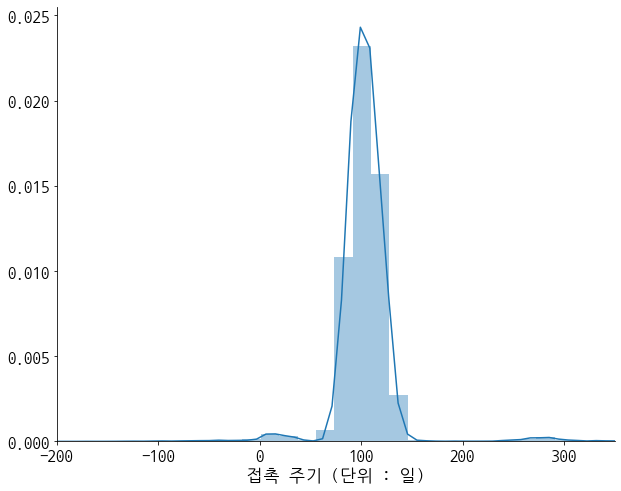

In [41]:
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.distplot(df.since_last_contact.astype('timedelta64[D]'), kde = True, norm_hist = False)
plt.xlim(-200, 350)
plt.ylim
plt.xlabel('접촉 주기 (단위 : 일)')
plt.savefig('접촉주기분석.png', dpi  = 500, bbox_inches = 'tight')

In [39]:
df.since_last_contact.mean()

Timedelta('103 days 19:42:55.835653')

In [10]:
df.nth_contact.value_counts()

1    305093
2    158076
3     76158
4     33371
5      9112
6       538
7        13
Name: nth_contact, dtype: int64

In [12]:
tab = pd.crosstab(df.nth_contact, df.dialresultcd)

In [13]:
tab['total'] = tab.sum(axis = 1)

In [14]:
tab['성공률'] = tab['성공-유치완료'] / tab['total'] * 100

In [15]:
tab.head(20) 

dialresultcd,TM-자체제외,성공-TM거부,성공-가망재통화,성공-거절,성공-단순재통화,성공-부재중,성공-유치완료,성공-중도취소,실패-무응답,오류번호,total,성공률
nth_contact,,,,,,,,,,,,
1,13750,9274,9042,136402,31799,1046,21621,1011,75992,5156,305093,7.086692
2,6988,4077,2969,74452,15534,552,4695,248,46519,2042,158076,2.970090
3,2690,1591,861,35518,7803,419,1333,86,24894,963,76158,1.750309
4,894,731,344,15692,3300,333,473,33,11191,380,33371,1.417398
5,200,209,82,4344,905,128,94,11,3052,87,9112,1.031607
6,9,7,8,259,56,1,7,1,185,5,538,1.301115
7,0,1,0,7,0,0,0,0,5,0,13,0.000000


In [16]:
tab['rownum'] = tab.index
tab.sum(axis = 0)[6] / tab.sum(axis = 0)[10] * 100

4.846306672321807

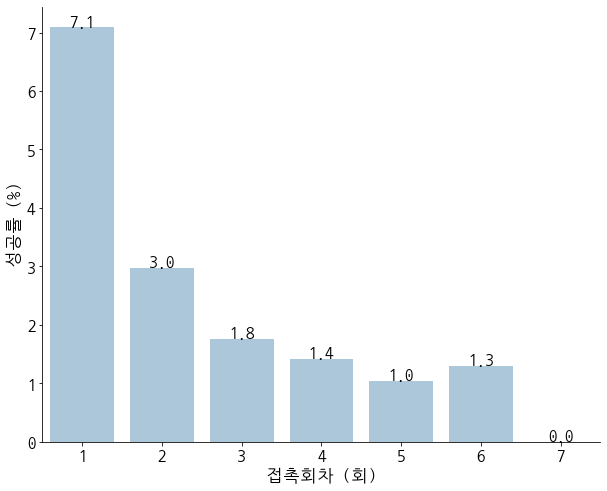

In [38]:
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.barplot(x = 'rownum', y = '성공률', data = tab, color = '#a5c8e1')

for i, bar in enumerate(ax.patches):
    h = bar.get_height()
    ax.text(
        i, # bar index (x coordinate of text)
        h+0.1, # y coordinate of text
        '{}'.format(round(float(h),1)),  # y label
        ha='center', 
        va='center', 
        size=17)
    
    
plt.ylabel('성공률 (%)')
plt.xlabel('접촉회차 (회)')
plt.savefig('fig1.png', dpi  = 500, bbox_inches = 'tight')

In [28]:
df[df['dialresultcd'] == '성공-유치완료'].shape[0] / df.shape[0] *100

3.8718350885054895